#**Project No:** *2*</font><br/>
#**Title:** <font color='red'>*Classification of Handwritten Digits*</font><br/><br/>


[PART 1](#part1) (Exploratory Analysis):
* [Libraries](#li)
* [Data Import](#di)
* [Data Transformation](#dt)
* [Data Splitting](#ds)
* [Digits' Frequencies](#df)
* [Digit Plotting](#dp)
* [SVDs for Digits](#svd)

[PART 2](#part2) (Tasks):
  * [Task 1](#t1)
  * [Task 2](#t2)
  * [Task 3](#t3)

<br>

# References
* [Matrix Methods in Data Mining & Pattern Recognition](https://github.com/geoav74/aueb_projects/blob/main/numerical_opt_%26_large-scale_linear_algebra/handwritten_digits_classification/hand_written_class.pdf)

<a name="part1"></a>
# **PART 1** (Exploratory Analysis)

<a name="li"></a>
>## **Libraries**

In [ ]:
import math
import time

import numpy as np
import pandas as pd
import progressbar

from numpy.linalg import svd, norm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
%matplotlib inline

<a name="di"></a>
>## **Data Import**

In [ ]:
# Mounting my google drive to the Colab's environment so to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the file path from my google drive directory
data_path = '/content/drive/MyDrive/Colab Notebooks/data.xlsx'

In [ ]:
# 256pixels x 1707samples array that holds the training images
azip = pd.read_excel(data_path, sheet_name='azip', header = None)

# 1 x 1707samples vector containing the corresponding to train images digits (the actual numbers)
dzip = pd.read_excel(data_path, sheet_name='dzip', header = None)

# 256pixels x 2007samples array that holds the test images
testzip = pd.read_excel(data_path, sheet_name='testzip', header = None)

# 1 x 2007samples vector containing the corresponding to test images  digits (the actual numbers)
dtest = pd.read_excel(data_path, sheet_name='dtest', header = None)

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<a name="dt"></a>
>## **Data Tranformation**

In [ ]:
# renaming datasets and tranform them into arrays
train = azip.to_numpy()
train_labels = dzip.to_numpy()

test = testzip.to_numpy()
test_labels = dtest.to_numpy()

In [ ]:
# just checking the first 10 out of 256px of flatten image 0
train[:10,0]

array([-1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -1.   , -0.631,
        0.862, -0.167])

In [ ]:
# shapes of our data
train_labels.shape, train.shape, test_labels.shape, test.shape

((1, 1707), (256, 1707), (1, 2007), (256, 2007))

<a name="ds"></a>
>## **Data Splitting**

In [ ]:
'''
Our training and test sets are not ready yet. we want a ratio 80%train:20%test sampling splits.
Therefore, we concatenate all images (train-test) and their corresponding labels to get there.
After that we split the train-test set accordingly (80:20)
'''
X = np.concatenate((train, test), axis = 1)
y = np.concatenate((train_labels.reshape(1707),
                    test_labels.reshape(2007)))

idx = int(round(X.shape[1]  * 0.8, 0))

X_train = X[:, :idx]
y_train = y[:idx]

X_test = X[:, idx + 1:]
y_test = y[idx + 1:]

print(f'The shape of our training-test sets:\n\
        Training images: {X_train.shape}\n\
        Training labels: {y_train.shape}\n\
        Test images: {X_test.shape}\n\
        Test labels: {y_test.shape}')

The shape of our training-test sets:
        Training images: (256, 2971)
        Training labels: (2971,)
        Test images: (256, 742)
        Test labels: (742,)


<a name="df"></a>
>## **Digits' Frequencies**

Text(0.5, 1.0, 'Digit Frequency in Whole Data')

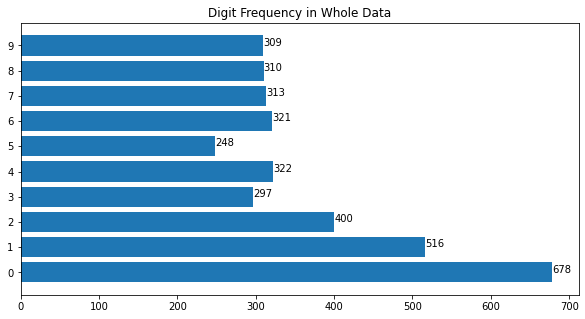

In [ ]:
# check the frequency of digits in training set
unique0, counts0 = np.unique(y, return_counts=True)
counts0 = np.asarray((unique0, counts0))

fig = plt.figure(figsize = (10, 5))
plt.barh(counts0[0], counts0[1], tick_label=counts0[0])
for index, value in enumerate(counts0[1]):
    plt.text(value, index,
             str(value))
plt.title('Digit Frequency in Whole Data')

Text(0.5, 1.0, 'Digit Frequency in Training Set')

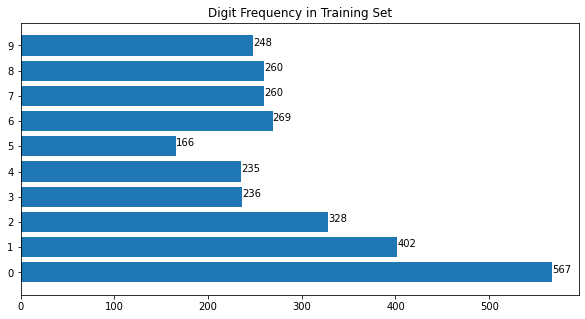

In [ ]:
# check the frequency of digits in training set
unique, counts = np.unique(y_train, return_counts=True)
counts = np.asarray((unique, counts))

fig = plt.figure(figsize = (10, 5))
plt.barh(counts[0], counts[1], tick_label=counts[0])
for index, value in enumerate(counts[1]):
    plt.text(value, index,
             str(value))
plt.title('Digit Frequency in Training Set')

Text(0.5, 1.0, 'Digit Frequency in Test Set')

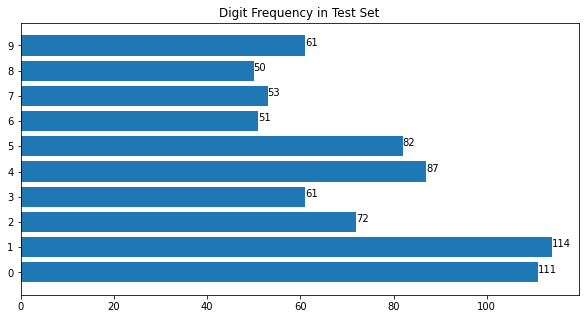

In [ ]:
# check the frequency of digits in test set
unique2, counts2 = np.unique(y_test, return_counts=True)
counts2 = np.asarray((unique2, counts2))

fig = plt.figure(figsize = (10, 5))
plt.barh(counts2[0], counts2[1], tick_label=counts2[0])
for index, value in enumerate(counts2[1]):
    plt.text(value, index,
             str(value))
plt.title('Digit Frequency in Test Set')

<a name="dp"></a>
>## **Digit Plotting**

In [ ]:
def PlotImg(image):
  '''
  USAGE: to convert a flatten given image of 256px x 1px into
         a 16px x 16px image and plot it
  INPUT:
    @image: the number of the image to plot
  OUTPUT:
    plot a 16x16px image
  '''
  fig = plt.figure(figsize=(4,4))
  plt.imshow(X_train[:, image].reshape((16,16)),
             cmap='gray')
  plt.title(f'This is number {y_train[image]}')

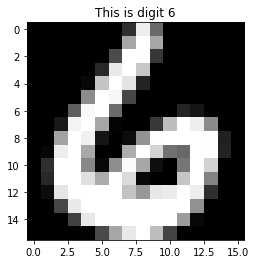

In [ ]:
# plot random digit from train
PlotImg(0)

<a name="svd"></a>
>## **SVDs for Digits**

In [ ]:
# creating a dictionary to store the SVDs for each digit
SVD = {d:{} for d in range(10)}

# iterating the digits to create the corresponding SVDs
for d in range(10):
    # indexing the SVDs per digit
    SVD[d] = np.linalg.svd(X_train[:, np.where(y_train == d)[0]],
                            full_matrices=True)

<a name="part2"></a>
# **PART 2**

<a name="t1"></a>
>## **Task 1** (Tuning)

In [ ]:
'''
For the number of basis vectors n = 5...20, we extract the first n columns
of the U matrix of the calculated SVD. we will then calculate the residuals
based on the relation ||I - U U.T z|| for each digit.
The minimum residual per digit for each test image will yield the digit that
the image represents.
'''
class_report = {}
conf_matrix = {}
accuracy = {}

# n is the number of basis vectors
for n in progressbar.progressbar(range(5, 21)):
    print(f'Calculating for {n} basis vectors')

    # calculate the U_k @ U_k.T once and store it
    UUT  = {}

    for d in range(10): # for each digit
        UUT[d] = SVD[d][0][:, :n] @ SVD[d][0][:, :n].T

    # store results for residuals and predictions
    res = np.zeros(10)
    classify = np.zeros(X_test.shape[1])
    bad = np.zeros(X_test.shape[1])


    for image in range(X_test.shape[1]): # iterate over the vectors of test images (2007)
        for d in range(10): # iterate over the number of digits (0-9)
            res[d] = np.linalg.norm((np.identity(X_test.shape[0]) - UUT[d])@X_test[:, image])

        # for each image extract the index
        # for the minimum residual
        # and classify
        classify[image] = np.argmin(res)
        bad[image] = np.argmax(res)

    # for each basis vector n
    # store the classification report, ie. the F1 and recall
    class_report[n] = classification_report(y_test, classify, output_dict = True)

    # store confusion matrix
    conf_matrix[n] = confusion_matrix(y_test, classify)

    # store accuracy
    accuracy[n] = conf_matrix[n].trace() / X_test.shape[1]

N/A% (0 of 16) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Calculating for 5 basis vectors


  6% (1 of 16) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:08

Calculating for 6 basis vectors


 12% (2 of 16) |###                      | Elapsed Time: 0:00:01 ETA:   0:00:08

Calculating for 7 basis vectors


 18% (3 of 16) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:07

Calculating for 8 basis vectors


 25% (4 of 16) |######                   | Elapsed Time: 0:00:02 ETA:   0:00:07

Calculating for 9 basis vectors


 31% (5 of 16) |#######                  | Elapsed Time: 0:00:03 ETA:   0:00:06

Calculating for 10 basis vectors


 37% (6 of 16) |#########                | Elapsed Time: 0:00:03 ETA:   0:00:06

Calculating for 11 basis vectors


 43% (7 of 16) |##########               | Elapsed Time: 0:00:04 ETA:   0:00:05

Calculating for 12 basis vectors


 50% (8 of 16) |############             | Elapsed Time: 0:00:05 ETA:   0:00:06

Calculating for 13 basis vectors


 56% (9 of 16) |##############           | Elapsed Time: 0:00:06 ETA:   0:00:09

Calculating for 14 basis vectors


 62% (10 of 16) |###############         | Elapsed Time: 0:00:07 ETA:   0:00:07

Calculating for 15 basis vectors


 68% (11 of 16) |################        | Elapsed Time: 0:00:08 ETA:   0:00:04

Calculating for 16 basis vectors


 75% (12 of 16) |##################      | Elapsed Time: 0:00:08 ETA:   0:00:02

Calculating for 17 basis vectors


 81% (13 of 16) |###################     | Elapsed Time: 0:00:09 ETA:   0:00:02

Calculating for 18 basis vectors


 87% (14 of 16) |#####################   | Elapsed Time: 0:00:10 ETA:   0:00:01

Calculating for 19 basis vectors


 93% (15 of 16) |######################  | Elapsed Time: 0:00:10 ETA:   0:00:00

Calculating for 20 basis vectors


100% (16 of 16) |########################| Elapsed Time: 0:00:11 Time:  0:00:11


In [ ]:
# Accuracies per number of basic vectors
print ('BasisVectors\tAccuracy(%)')

for key in accuracy.keys():
    print (f'{key}\t\t {round(accuracy[key] * 100, 2)}')

BasicVectors	Accuracy(%)
5		 92.05
6		 92.99
7		 92.32
8		 92.72
9		 93.4
10		 93.8
11		 94.47
12		 94.47
13		 94.61
14		 94.61
15		 95.01
16		 94.88
17		 94.34
18		 94.61
19		 94.88
20		 94.74


Text(16, 0.9301347708894878, 'Max value\n Vectors: 15 \n Accuracy: 0.95')

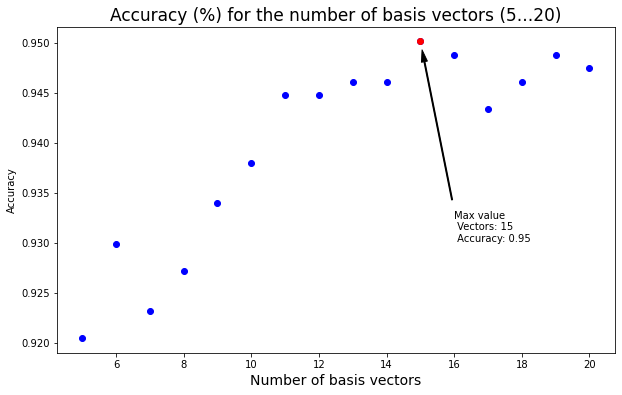

In [ ]:
plt.figure(figsize=(10,6))

# plot accuracy for each number of basis vectors
plt.scatter(accuracy.keys() , accuracy.values(), c= 'b')
keys = list(accuracy.keys())
values = list(accuracy.values())
plt.scatter(keys[values.index(max(values))], max(values), c = 'r')
plt.title('Accuracy for the number of basis vectors (5...20)',
          fontsize=17)
plt.xlabel('Number of basis vectors', fontsize=14)
plt.ylabel('Accuracy')
plt.annotate(f'Max value\n Vectors: {keys[values.index(max(values))]} \n Accuracy: {max(values):.2}',
             xy=(keys[values.index(max(values))], max(values)),
             xytext=(keys[values.index(max(values))]+1, max(values)-0.02),
             arrowprops = dict(facecolor='black', shrink=0.05, width=1, headwidth=6))

<a name="t2"></a>
>## **Task 2** (Performance)

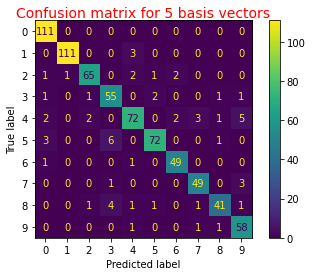

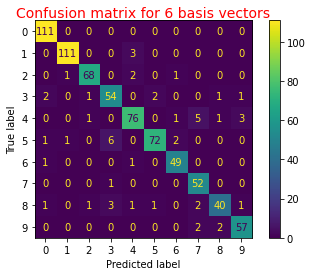

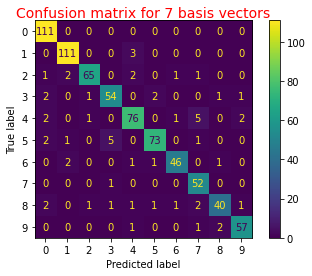

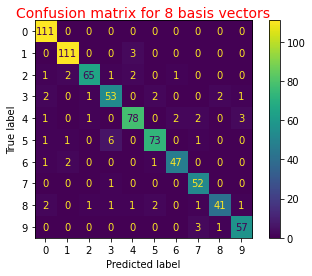

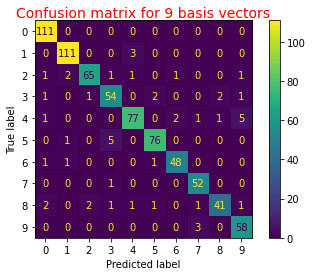

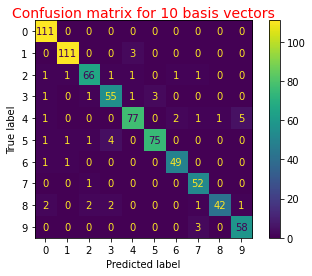

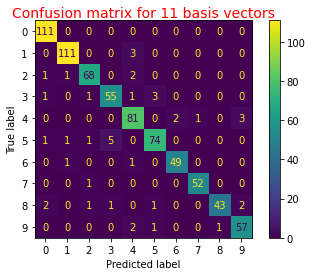

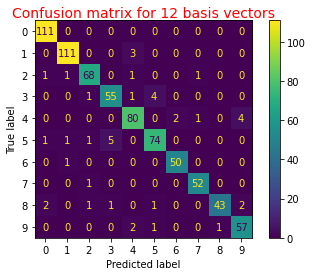

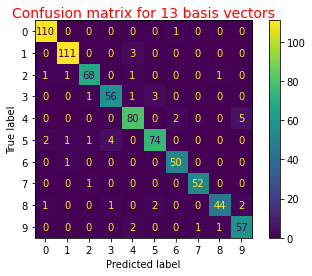

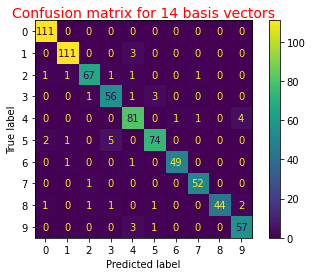

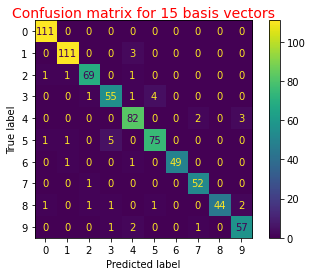

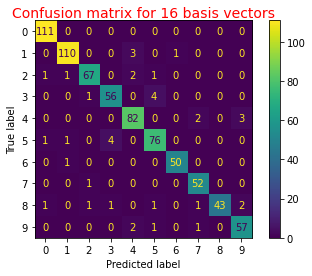

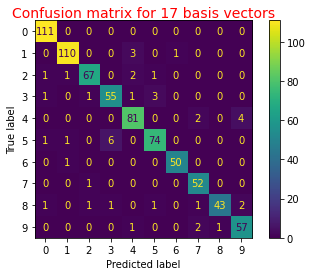

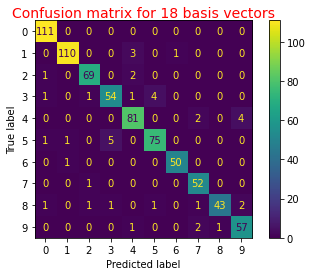

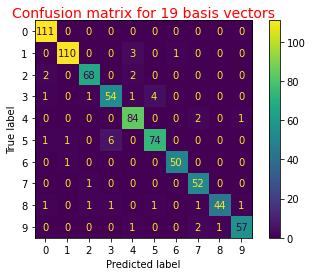

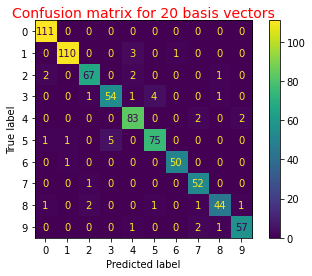

In [ ]:
# displaying the confusion matrices
for n in range(5, 21):
    ConfusionMatrixDisplay(confusion_matrix=conf_matrix[n]).plot()
    plt.title(f'Confusion matrix for {n} basis vectors', fontsize=14, color="red")

In [ ]:
# displaying the classification reports
for n in range(5, 21):
  print(f'Classification report for {n} basis vectors\n')
  print(pd.DataFrame(class_report[n]).transpose())
  print("-------------------------------------------------------\n")

Classification report for 5 basis vectors

              precision    recall  f1-score     support
0              0.932773  1.000000  0.965217  111.000000
1              0.991071  0.973684  0.982301  114.000000
2              0.942029  0.902778  0.921986   72.000000
3              0.833333  0.901639  0.866142   61.000000
4              0.900000  0.827586  0.862275   87.000000
5              0.947368  0.878049  0.911392   82.000000
6              0.924528  0.960784  0.942308   51.000000
7              0.907407  0.924528  0.915888   53.000000
8              0.911111  0.820000  0.863158   50.000000
9              0.852941  0.950820  0.899225   61.000000
accuracy       0.920485  0.920485  0.920485    0.920485
macro avg      0.914256  0.913987  0.912989  742.000000
weighted avg   0.921822  0.920485  0.920083  742.000000
-------------------------------------------------------

Classification report for 6 basis vectors

              precision    recall  f1-score     support
0              0.

>> ### Best Performance per Digits

In [ ]:
# selecting the confusion matrix for the optimum number of basis vectors
opt_confMatrix = pd.DataFrame(conf_matrix[keys[values.index(max(values))]],
                              index = [i for i in range(0, 10)],
                              columns = [i for i in range(0, 10)])

# best scores per digit
opt_residuals = []
for pos in range(opt_confMatrix.shape[0]):
    acc = opt_confMatrix.loc[pos, pos] / opt_confMatrix.loc[pos, :].sum()
    opt_residuals.append(round(acc* 100, 2))

pd.DataFrame(opt_residuals,
             index = [i for i in range(0,10)],
             columns = ['accuracy'])

,accuracy
0,100.00
1,97.37
2,95.83
3,90.16
4,94.25
5,91.46
6,96.08
7,98.11
8,88.00
9,93.44


>> ### Worst Performance per Digits

In [ ]:
worst = pd.DataFrame(opt_residuals,
                          index = [i for i in range(0,10)],
                          columns = ['accuracy'])

# the lower, the worse
worst.sort_values(by='accuracy')

,accuracy
8,88.00
3,90.16
5,91.46
9,93.44
4,94.25
2,95.83
6,96.08
1,97.37
7,98.11
0,100.00


>> ### Ploting the Worst Digit Classification

In [ ]:
# looking for more info about the worst performance like digit-8
X_test[:, np.where(y_test == 8)].shape

(256, 1, 50)

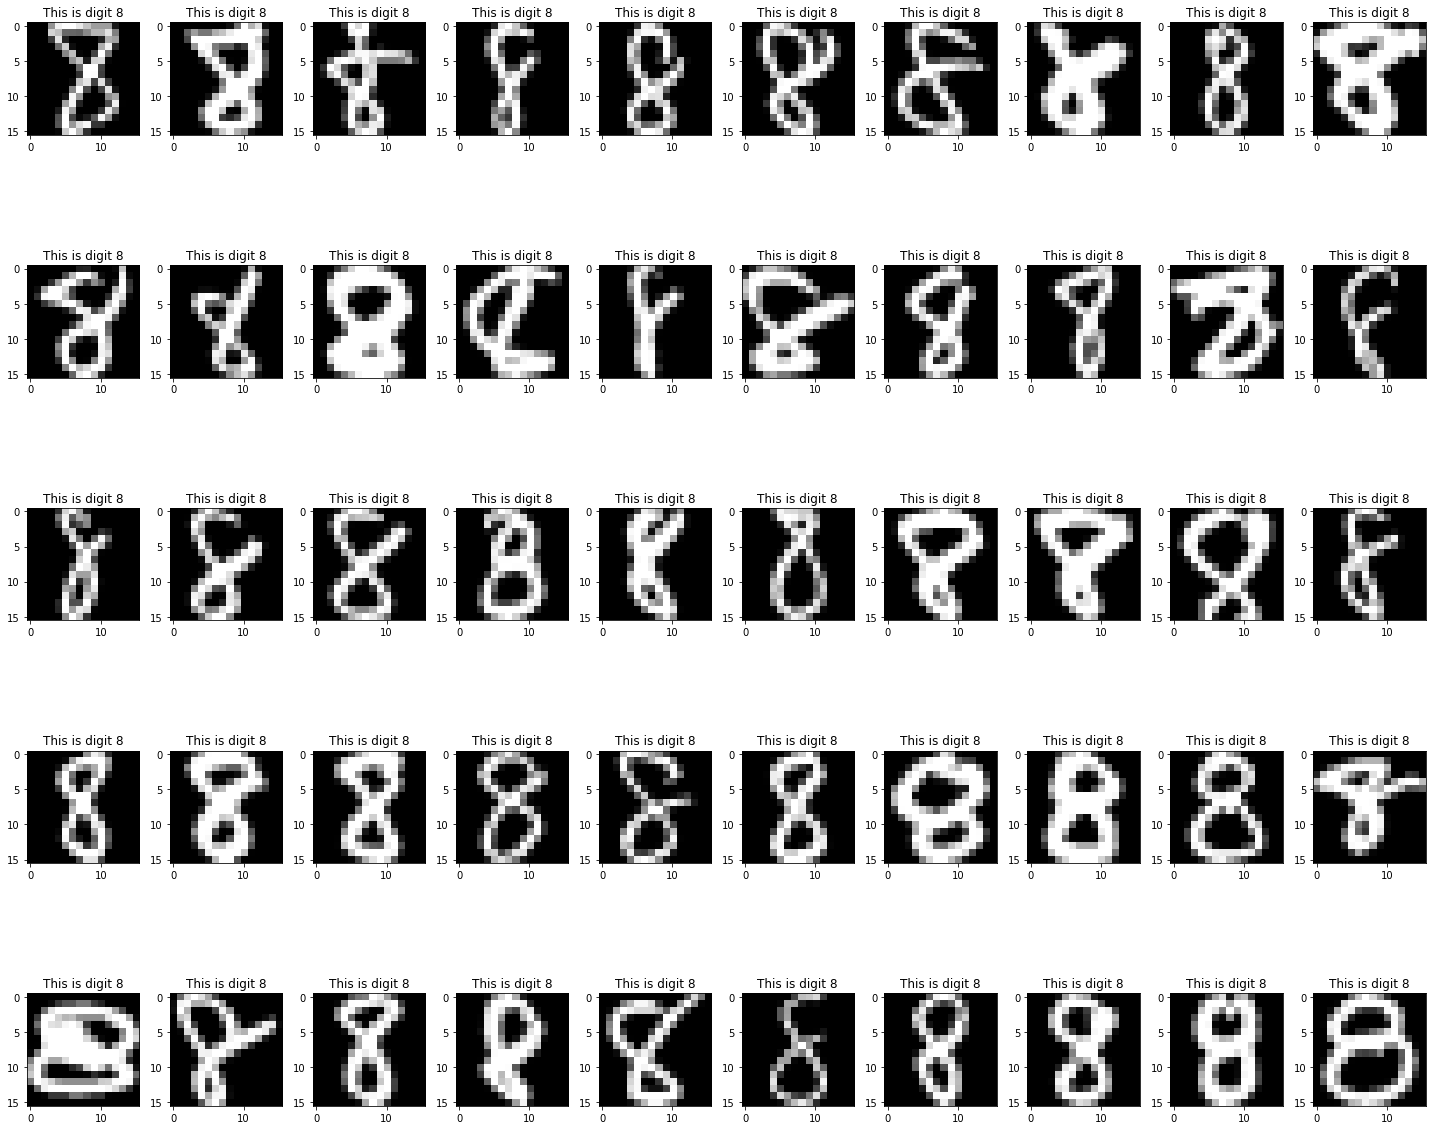

In [ ]:
items = np.where(y_test == 8)
items2 = list(items[0])
fig = plt.figure(figsize=(20,20))

for i,k in enumerate(items2):
  fig.add_subplot(5, 10, i+1)
  plt.imshow(X_test[:, k].reshape((16,16)), cmap='gray')
  fig.tight_layout()
  plt.title(f'This is digit {y_test[k]}')

>> ### Ploting the Best Digit Classification

In [ ]:
# looking for more info about the Best performance like digit-0
X_test[:, np.where(y_test == 0)].shape

(256, 1, 111)

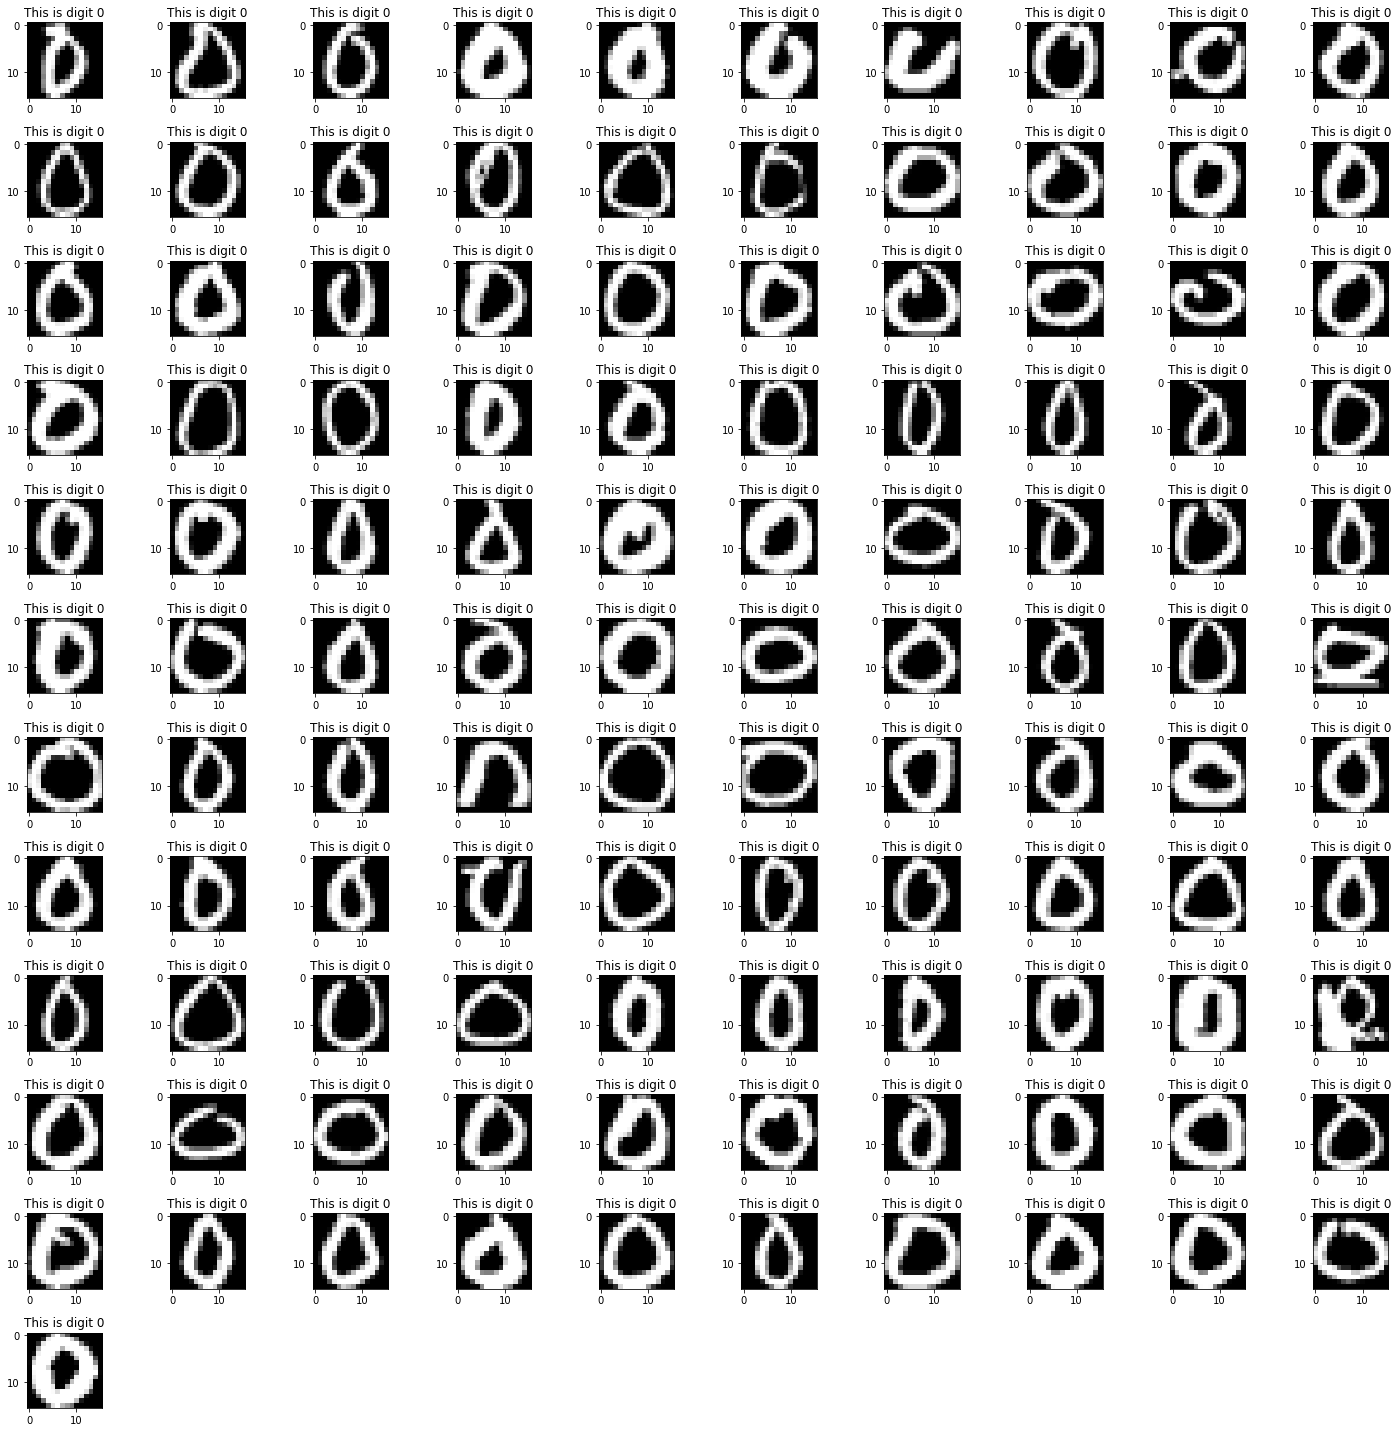

In [ ]:
items00 = np.where(y_test == 0)
items01 = list(items00[0])
fig = plt.figure(figsize=(20,20))

for i,k in enumerate(items01):
  fig.add_subplot(12, 10, i+1)
  plt.imshow(X_test[:, k].reshape((16,16)), cmap='gray')
  fig.tight_layout()
  plt.title(f'This is digit {y_test[k]}')

As we can observe, digit-0 comparing with digit-8 is clearly written which it has the worst performance in classification.

<a name="t3"></a>
>## **Task 3** (Singular Values)

>> ### The Singular Values Story

In [ ]:
# extract the singular vales per digit
singular_values = {d:{} for d in range(10)}

max_singular_value = {d:{} for d in range(10)}

for d in range(0, 10):
    sing_vals = np.zeros(np.diag(SVD[d][1]).shape[0])

    for pos in range(0, np.diag(SVD[d][1]).shape[0]):
        sing_vals[pos] = np.diag(SVD[d][1])[pos][pos]

    singular_values[d] = sing_vals
    max_singular_value[d] = sing_vals.max()

singulars = pd.DataFrame(max_singular_value.values(),
                         columns = ['Max_Singular_Values'])


# presenting the singular values with lowest score
singulars.sort_values(by='Max_Singular_Values', ascending=False)

,Max_Singular_Values
1,294.203154
0,241.555333
7,199.430930
9,192.695883
6,187.702719
2,174.640816
8,173.991941
4,169.436389
3,166.467824
5,127.596879


As we can observe, digits with higher singular values have better classification performance

>> ### The Residuals Story

In [ ]:
# looking up the residuals for n-basis vectors
residuals = {n:{} for n in range(15)}

for n in progressbar.progressbar(range(0, 15)):

    # for each digit
    res_dig = {d:{} for d in range(10)}

    for d in range(10):
        UUT[d] = SVD[d][0][:, :n] @ SVD[d][0][:, :n].T
        X = X_test[:, np.where(y_test == d)[0]]

        for image in range(X.shape[1]):
            res_dig[d] = np.linalg.norm((np.identity(X.shape[0]) - UUT[d])@X[:, image])

    residuals[n] =  res_dig

100% (15 of 15) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


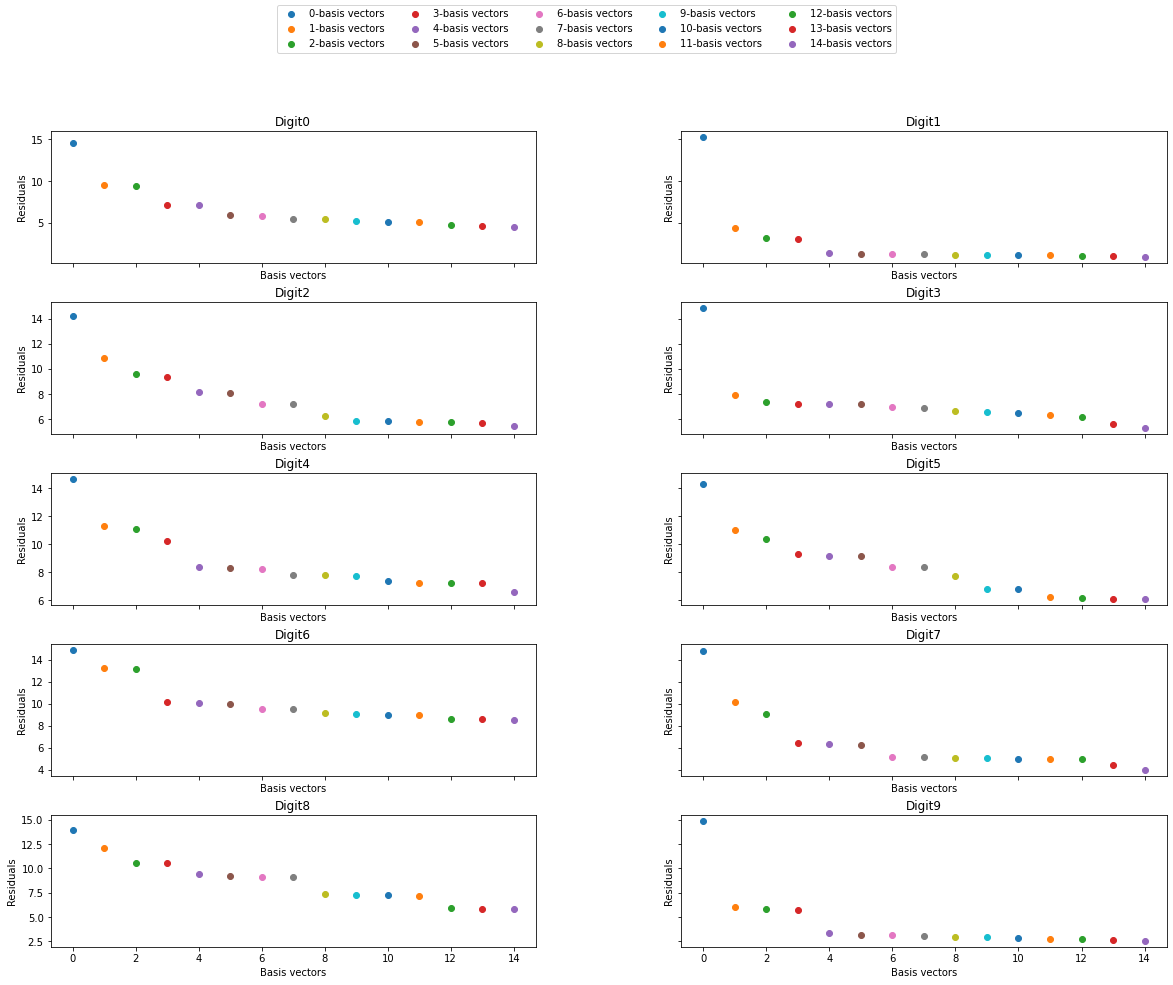

In [ ]:
# Plot residuals for each digit and #basis vectors

fig = plt.figure(figsize = (20, 15))

gs = fig.add_gridspec(nrows = 5, ncols = 2,
                      hspace=0.3, wspace=0.3)

axes = gs.subplots(sharex='col', sharey='row')

labels = [f'{i}-basis vectors' for i in range(15)]

for digit, ax in enumerate(axes.flatten()):
    for n in range(15):
        ax.scatter(n, residuals[n][digit],
                label = f'{n+1} bn')
        ax.set_title(f'Digit{digit}')

    ax.set_xlabel("Basis vectors")
    ax.set_ylabel("Residuals")

fig.legend(labels=labels, loc="upper center", ncol=5)
plt.show()

In [ ]:
pd.DataFrame(residuals.values())

,0,1,2,3,4,5,6,7,8,9
0,14.614268,15.240179,14.190426,14.818021,14.635076,14.282437,14.847349,14.738287,13.928814,14.853794
1,9.579020,4.459765,10.836507,7.895547,11.288203,11.041033,13.250774,10.108007,12.128783,6.018191
2,9.437465,3.185908,9.604192,7.352325,11.116217,10.391526,13.127189,9.098695,10.594199,5.868412
3,7.198936,3.115900,9.352826,7.256710,10.206284,9.328444,10.170362,6.400011,10.578604,5.750576
4,7.198886,1.393883,8.179168,7.237258,8.405224,9.178933,10.058755,6.375557,9.435594,3.413155
5,5.916823,1.302631,8.091694,7.212134,8.334876,9.156652,9.990679,6.244858,9.227624,3.183356
6,5.891331,1.302438,7.237459,6.965302,8.258772,8.387947,9.488848,5.188548,9.155742,3.150160
7,5.428833,1.259245,7.232314,6.887055,7.821954,8.379527,9.480526,5.188537,9.151236,3.056242
8,5.428828,1.213772,6.282430,6.649834,7.817079,7.708917,9.123631,5.106669,7.417670,2.985929
9,5.192864,1.201586,5.898572,6.598950,7.710936,6.834759,9.030296,5.106495,7.251322,2.904804


As we can observe from the residuals, all digits have high values in residuals when using 0...3 basis vectors whereas the majority of which drop from basis vectors > 4. Digit-6's residuals remain high though in all possible scenarios we're investigating. Furthermore, the fact that from the beginning the uneven frequency distribution of the digits, supports the claim that digits with low classification perfomances are the ones with less samples along the dataset we're using.